# Time Series Analysis

Significance of Time Series
TSA is the backbone for prediction and forecasting analysis, specific to time-based problem statements.

Analyzing the historical dataset and its patterns
Understanding and matching the current situation with patterns derived from the previous stage.
Understanding the factor or factors influencing certain variable(s) in different periods.

In [76]:
#!pip install seaborn
#!pip install -U scikit-learn
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
from datetime import timedelta

df=pd.read_csv('harth2/S006.csv')
df = df[0::1000]#11835->2 28909->5 5835->1 2835->0.3
df.head(10)

,time_only,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
0,00:00:00.000000,-0.760242,0.299570,0.468570,-5.092732,-0.298644,0.709439,6
1000,00:00:11.660000,-0.982601,0.113192,0.073887,-1.018805,0.029296,-0.210907,6
2000,00:00:21.660000,-0.982083,0.063831,0.118327,-0.975110,0.055633,-0.244945,6
3000,00:00:31.660000,-0.983163,0.104238,0.074705,-0.972115,0.055130,-0.210555,6
4000,00:00:41.660000,-0.990800,0.040963,0.081016,-0.973737,0.118480,-0.243907,3
5000,00:00:51.660000,-0.983938,0.123942,0.112883,-0.973930,0.050318,-0.232627,6
6000,00:01:01.660000,-0.983747,0.014207,0.133151,-0.973743,0.116560,-0.236460,6
7000,00:01:11.660000,-0.983841,0.127187,0.069297,-0.973693,0.021430,-0.241972,6
8000,00:01:21.660000,-0.984679,0.112244,0.068433,-0.973611,0.021611,-0.243054,6
9000,00:01:31.660000,-0.984027,0.126707,0.099662,-0.973191,0.006442,-0.257234,6


In [78]:
medians = df.drop(['label'], axis=1)
medians.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
back_x,409.0,-0.802092,0.230532,-1.248172,-0.983938,-0.937309,-0.657141,-0.241788
back_y,409.0,0.002133,0.181789,-0.913995,0.001041,0.033608,0.076182,0.783616
back_z,409.0,-0.273394,0.443733,-0.914813,-0.701598,-0.271121,0.050320,0.959800
thigh_x,409.0,-0.375678,0.555611,-5.092732,-0.953413,-0.277434,0.069372,0.588580
thigh_y,409.0,0.138837,0.209264,-0.816478,0.022449,0.077708,0.233575,1.281115
thigh_z,409.0,0.643847,0.512326,-0.740458,0.291431,0.925161,1.001939,1.973893


In [79]:
df.index = pd.to_datetime(df['time_only'])

C:\Users\karag\AppData\Local\Temp\ipykernel_8060\1492332891.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.index = pd.to_datetime(df['time_only'])


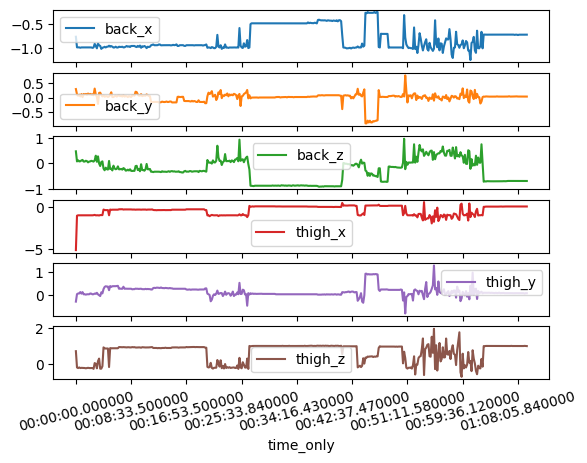

In [80]:
# Assuming 'timestamp' is the name of your timestamp column
#df['timestamp'] = pd.to_datetime(df['timestamp']) # Convert timestamp to datetime if it's not already
#df['timestamp'] = df['timestamp'].dt.strftime('%H:%M:%S') # Format timestamp column

# Now, you can plot the data as before
plot_cols = ['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z']
plot_features = df[plot_cols]

# Assign the formatted timestamp as index
plot_features.index = df['time_only']

#plt.figure(figsize=(20, 15))  # Adjust the width and height as needed
plot_features.plot(subplots=True)

plt.xticks(rotation=15)  # Adjust the angle as needed

plt.show()

            count      mean       std       min       25%       50%       75%  \
back_x   408709.0 -0.802201  0.238347 -3.542889 -0.983647 -0.937195 -0.654541   
back_y   408709.0 -0.000687  0.189062 -3.016498  0.001063  0.033240  0.074822   
back_z   408709.0 -0.274718  0.441805 -1.024363 -0.702338 -0.277446  0.064811   
thigh_x  408709.0 -0.370317  0.506666 -6.844045 -0.952840 -0.277711  0.068999   
thigh_y  408709.0  0.143471  0.213864 -5.757406  0.022534  0.086248  0.246292   
thigh_z  408709.0  0.617527  0.536430 -4.884791  0.144114  0.924066  1.001372   

              max  
back_x   0.952109  
back_y   2.569339  
back_z   1.628023  
thigh_x  3.898547  
thigh_y  4.602909  
thigh_z  5.391660  


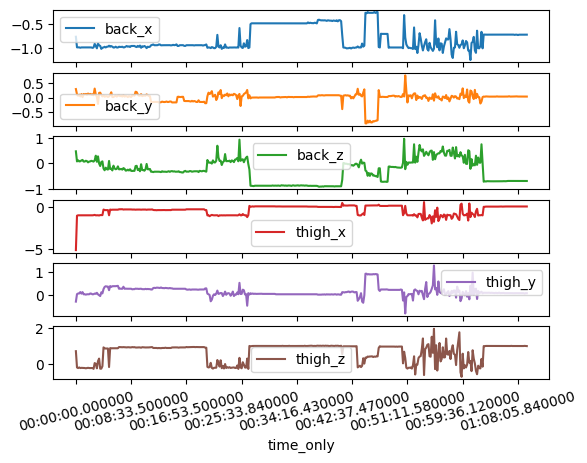

            count      mean       std       min       25%       50%       75%  \
back_x   418989.0 -0.920351  0.130877 -3.066853 -0.998823 -0.972054 -0.826290   
back_y   418989.0  0.040018  0.107516 -1.209330 -0.013310  0.048302  0.101082   
back_z   418989.0 -0.326746  0.297591 -0.960136 -0.580225 -0.297335 -0.143575   
thigh_x  418989.0 -0.332798  0.463427 -5.922062 -0.882999 -0.085027 -0.005905   
thigh_y  418989.0  0.050361  0.218070 -2.857320 -0.088989  0.068947  0.166770   
thigh_z  418989.0  0.656598  0.523197 -4.233158  0.256630  0.950087  0.994429   

              max  
back_x   0.873471  
back_y   1.255642  
back_z   1.872940  
thigh_x  2.312848  
thigh_y  4.809320  
thigh_z  5.324356  


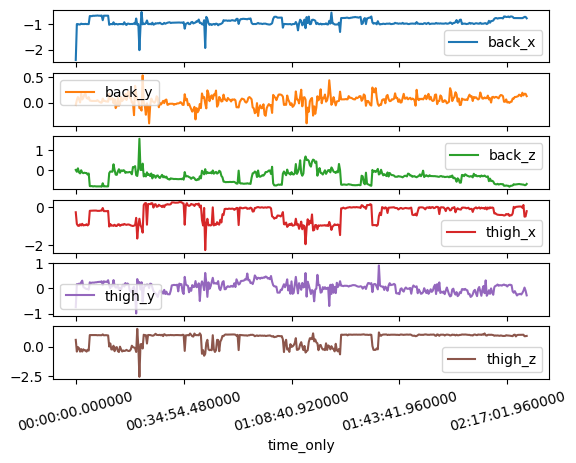

            count      mean       std       min       25%       50%       75%  \
back_x   154464.0 -0.944405  0.199062 -5.238408 -1.040717 -0.953725 -0.847938   
back_y   154464.0 -0.056068  0.169198 -2.691137 -0.144739 -0.053242  0.037704   
back_z   154464.0  0.312780  0.160414 -1.353473  0.227453  0.302492  0.384121   
thigh_x  154464.0 -0.957280  0.656728 -6.863094 -1.409137 -1.036580 -0.617031   
thigh_y  154464.0  0.096268  0.320348 -3.901566 -0.090855  0.083404  0.291041   
thigh_z  154464.0  0.312047  0.848870 -5.651375 -0.269434  0.199040  0.815889   

              max  
back_x   0.858455  
back_y   2.589111  
back_z   4.909483  
thigh_x  4.092486  
thigh_y  4.544893  
thigh_z  5.378879  


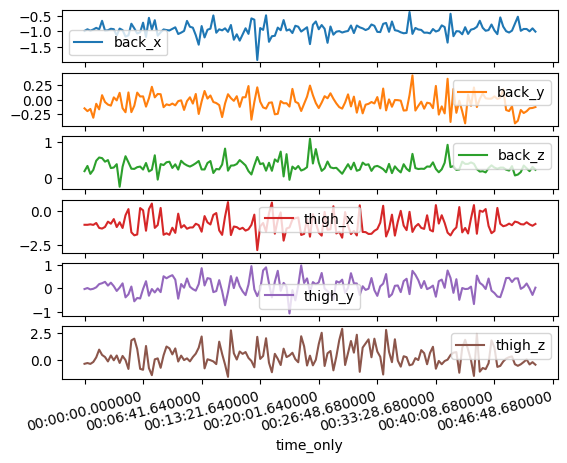

            count      mean       std       min       25%       50%       75%  \
back_x   351649.0 -1.019898  0.186093 -2.365137 -1.049960 -1.015238 -0.974607   
back_y   351649.0 -0.002224  0.089664 -0.891766 -0.054221 -0.000030  0.047685   
back_z   351649.0 -0.014543  0.155128 -1.120693 -0.085287 -0.000642  0.071708   
thigh_x  351649.0 -0.905389  0.409359 -4.449651 -1.035450 -0.989746 -0.843884   
thigh_y  351649.0  0.017624  0.262037 -3.333658 -0.097479  0.020164  0.115373   
thigh_z  351649.0  0.146144  0.542611 -4.198951 -0.114183  0.022649  0.313726   

              max  
back_x  -0.309204  
back_y   0.994556  
back_z   1.586732  
thigh_x  1.372425  
thigh_y  2.662940  
thigh_z  5.062087  


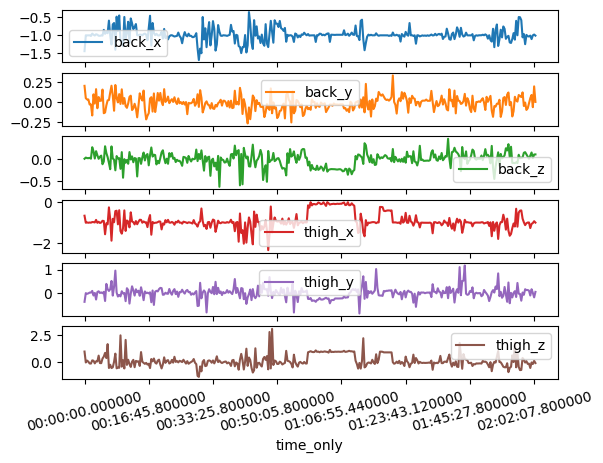

            count      mean       std       min       25%       50%       75%  \
back_x   382414.0 -0.915515  0.242906 -3.810360 -1.000070 -0.987624 -0.971043   
back_y   382414.0  0.005064  0.137488 -1.506640 -0.035278  0.023321  0.073108   
back_z   382414.0 -0.130062  0.290484 -1.343093 -0.151946 -0.058455  0.027089   
thigh_x  382414.0 -0.321236  0.350287 -6.547333 -0.451028 -0.165490 -0.103086   
thigh_y  382414.0  0.011753  0.204115 -3.652872 -0.121605  0.049881  0.131408   
thigh_z  382414.0  0.809352  0.395776 -2.656861  0.879231  0.978771  0.999394   

              max  
back_x   0.511867  
back_y   1.758769  
back_z   2.035369  
thigh_x  2.828190  
thigh_y  4.131459  
thigh_z  3.386593  


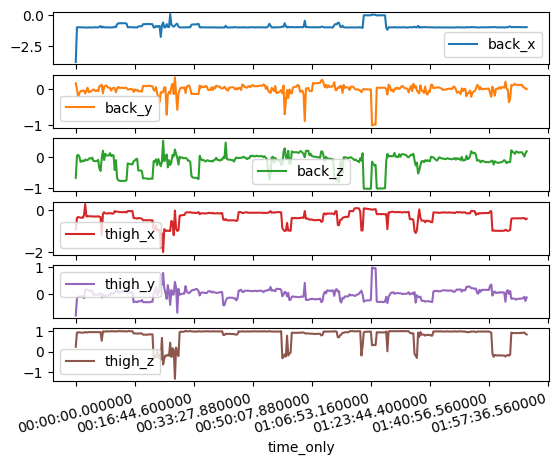

            count      mean       std       min       25%       50%       75%  \
back_x   369077.0 -0.947547  0.209417 -4.207104 -1.014565 -0.999692 -0.950918   
back_y   369077.0 -0.028837  0.174154 -1.665719 -0.093863 -0.047090  0.037271   
back_z   369077.0 -0.238492  0.238924 -1.304832 -0.313181 -0.218153 -0.120548   
thigh_x  369077.0 -0.504721  0.424225 -6.583317 -0.939334 -0.350281 -0.175094   
thigh_y  369077.0  0.019820  0.221742 -6.385980 -0.071942  0.000324  0.134149   
thigh_z  369077.0  0.566328  0.548653 -7.114719  0.051835  0.904076  0.970459   

              max  
back_x   1.204414  
back_y   1.202595  
back_z   1.588293  
thigh_x  3.545294  
thigh_y  5.213833  
thigh_z  7.914523  


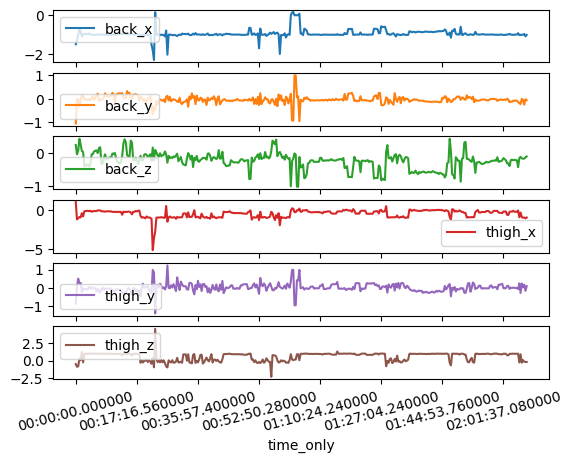

            count      mean       std       min       25%       50%       75%  \
back_x   366487.0 -0.922165  0.190579 -4.071435 -0.976491 -0.953801 -0.930731   
back_y   366487.0 -0.028864  0.170273 -1.798501 -0.108955 -0.018716  0.047066   
back_z   366487.0 -0.064206  0.279650 -1.096072 -0.304104  0.026588  0.157106   
thigh_x  366487.0 -0.380881  0.479737 -5.633781 -0.916634 -0.220979 -0.121423   
thigh_y  366487.0  0.206831  0.243406 -3.365493  0.123474  0.234348  0.330906   
thigh_z  366487.0  0.633981  0.484877 -6.411097  0.199689  0.913426  0.940234   

              max  
back_x   2.008787  
back_y   1.364399  
back_z   2.085816  
thigh_x  3.832953  
thigh_y  7.119775  
thigh_z  6.471068  


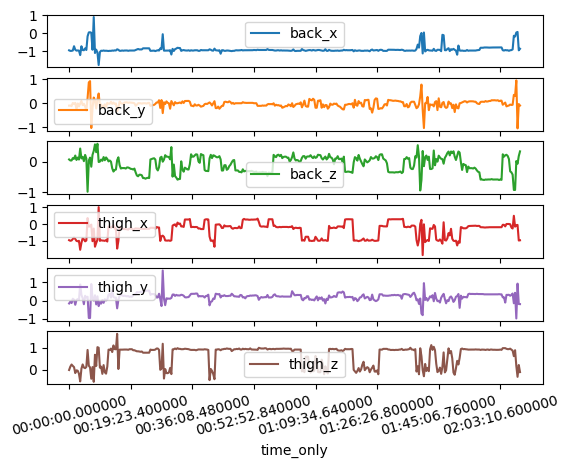

            count      mean       std       min       25%       50%       75%  \
back_x   418392.0 -0.800805  0.416190 -4.605796 -0.989973 -0.974506 -0.893100   
back_y   418392.0  0.047076  0.281277 -1.498859  0.003038  0.052800  0.096406   
back_z   418392.0 -0.136345  0.337921 -1.185234 -0.401971 -0.012110  0.038175   
thigh_x  418392.0 -0.542872  0.461284 -6.986333 -0.934995 -0.354454 -0.248281   
thigh_y  418392.0  0.021875  0.335291 -4.138592 -0.012051  0.022447  0.085084   
thigh_z  418392.0  0.439821  0.613688 -4.365582 -0.197191  0.916258  0.961955   

              max  
back_x   1.132021  
back_y   1.237389  
back_z   2.723054  
thigh_x  3.163146  
thigh_y  4.332594  
thigh_z  5.772754  


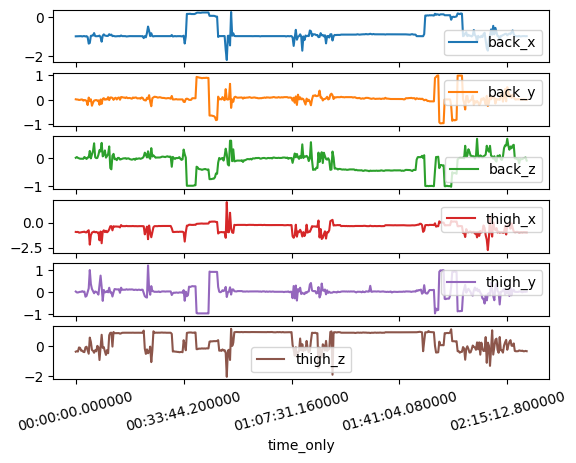

            count      mean       std       min       25%       50%       75%  \
back_x   355418.0 -0.809658  0.308717 -4.892428 -0.990172 -0.959287 -0.693598   
back_y   355418.0 -0.085955  0.275176 -2.048257 -0.133641 -0.039233  0.007355   
back_z   355418.0 -0.222711  0.375801 -1.104209 -0.639209 -0.115699  0.091282   
thigh_x  355418.0 -0.490494  0.446895 -6.991070 -0.934960 -0.298710 -0.161719   
thigh_y  355418.0  0.104894  0.323904 -4.360956 -0.011752  0.060182  0.127358   
thigh_z  355418.0  0.513936  0.593757 -6.086875 -0.005335  0.846812  0.972902   

              max  
back_x   1.698069  
back_y   1.510733  
back_z   2.352446  
thigh_x  4.052836  
thigh_y  6.982736  
thigh_z  7.692861  


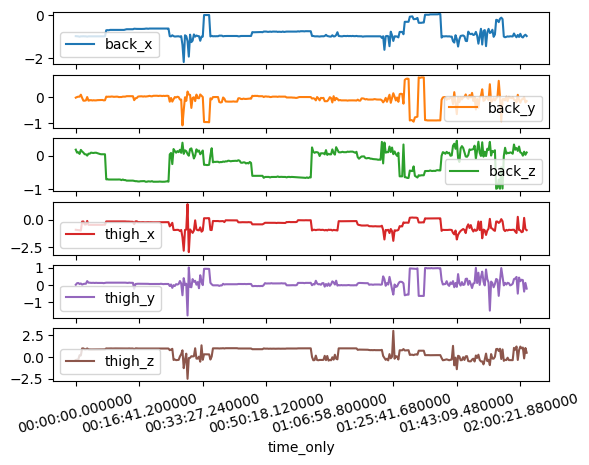

            count      mean       std       min       25%       50%       75%  \
back_x   366609.0 -0.877122  0.344197 -5.406958 -1.015725 -1.005594 -0.911785   
back_y   366609.0  0.044456  0.279297 -2.071573 -0.004517  0.043268  0.089068   
back_z   366609.0 -0.023970  0.334358 -3.055944 -0.231188  0.000020  0.079042   
thigh_x  366609.0 -0.442412  0.452621 -6.703075 -0.733601 -0.363347 -0.128969   
thigh_y  366609.0  0.017154  0.312487 -2.721946 -0.102230  0.030136  0.124147   
thigh_z  366609.0  0.575344  0.557854 -4.416835  0.095589  0.917147  0.966812   

              max  
back_x   2.291708  
back_y   3.482324  
back_z   1.676596  
thigh_x  4.741718  
thigh_y  3.869824  
thigh_z  5.371230  


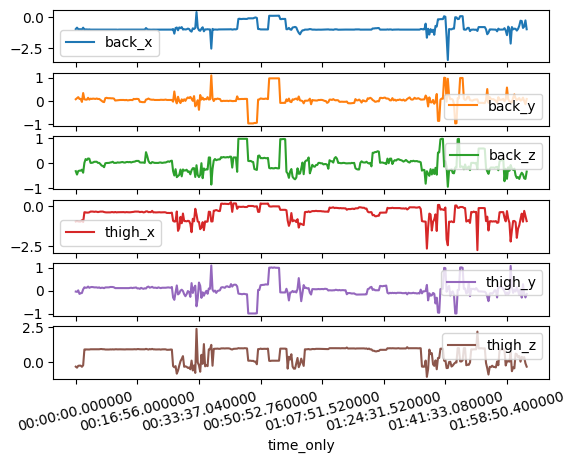

            count      mean       std       min       25%       50%       75%  \
back_x   322271.0 -0.849371  0.412553 -5.403776 -0.992233 -0.989004 -0.751299   
back_y   322271.0  0.057596  0.291895 -1.927772  0.025229  0.087089  0.134302   
back_z   322271.0 -0.113085  0.326672 -1.475367 -0.193895 -0.063354  0.013165   
thigh_x  322271.0 -0.632512  0.635640 -7.483251 -0.974293 -0.506103 -0.287348   
thigh_y  322271.0  0.004113  0.532962 -6.336466 -0.225777 -0.087604  0.129628   
thigh_z  322271.0  0.407037  0.704324 -7.208220 -0.104041  0.758592  0.872587   

              max  
back_x   1.308720  
back_y   1.910584  
back_z   2.584467  
thigh_x  5.372528  
thigh_y  7.182237  
thigh_z  6.766558  


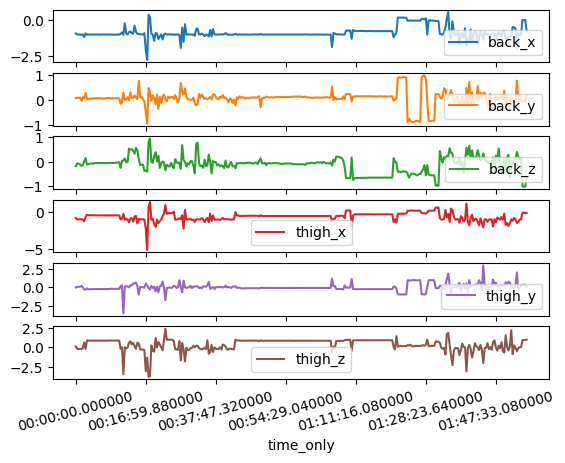

            count      mean       std       min       25%       50%       75%  \
back_x   297945.0 -0.884114  0.280108 -4.534207 -0.984805 -0.968158 -0.859052   
back_y   297945.0  0.045138  0.228727 -1.597037 -0.015542  0.037005  0.103556   
back_z   297945.0 -0.283373  0.328931 -1.895429 -0.501781 -0.352615 -0.047056   
thigh_x  297945.0 -0.516244  0.406174 -7.003960 -0.663670 -0.389895 -0.342404   
thigh_y  297945.0  0.013598  0.291871 -3.670848 -0.087225  0.014350  0.144606   
thigh_z  297945.0  0.619594  0.525315 -4.172375  0.213484  0.893462  0.933219   

              max  
back_x   0.982952  
back_y   2.436321  
back_z   3.306308  
thigh_x  3.625953  
thigh_y  2.299290  
thigh_z  5.440628  


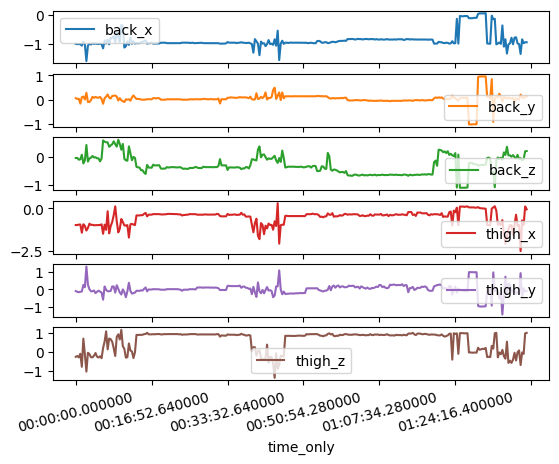

            count      mean       std       min       25%       50%       75%  \
back_x   371496.0 -0.803528  0.355209 -5.085023 -0.984387 -0.953010 -0.728796   
back_y   371496.0  0.018871  0.305109 -2.577956 -0.013543  0.019486  0.068466   
back_z   371496.0 -0.228900  0.345907 -2.482318 -0.414677 -0.125059 -0.007768   
thigh_x  371496.0 -0.451840  0.444383 -6.713296 -0.609531 -0.437712 -0.153483   
thigh_y  371496.0  0.070939  0.364400 -5.403167  0.008496  0.104281  0.152206   
thigh_z  371496.0  0.631276  0.515623 -6.442862  0.233380  0.870668  0.944471   

              max  
back_x   1.623730  
back_y   2.810108  
back_z   3.249592  
thigh_x  4.368634  
thigh_y  5.732569  
thigh_z  8.406235  


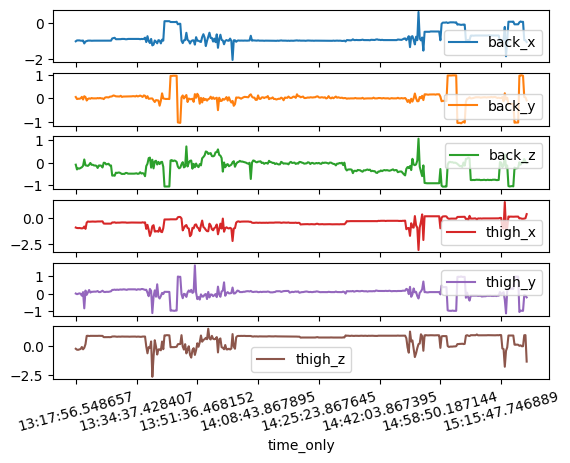

            count      mean       std       min       25%       50%       75%  \
back_x   302247.0 -0.929234  0.320802 -4.800855 -1.031566 -1.018402 -0.983735   
back_y   302247.0  0.004081  0.243616 -2.195478 -0.034414  0.001533  0.043557   
back_z   302247.0 -0.079903  0.301392 -1.382702 -0.218272 -0.086723  0.079674   
thigh_x  302247.0 -0.467381  0.506164 -6.838976 -0.917711 -0.291162 -0.154519   
thigh_y  302247.0  0.150108  0.303757 -3.412234  0.044791  0.144440  0.262642   
thigh_z  302247.0  0.483539  0.624394 -3.335828 -0.163295  0.901996  0.947983   

              max  
back_x   1.253294  
back_y   2.747783  
back_z   2.469329  
thigh_x  2.279510  
thigh_y  4.632514  
thigh_z  3.987468  


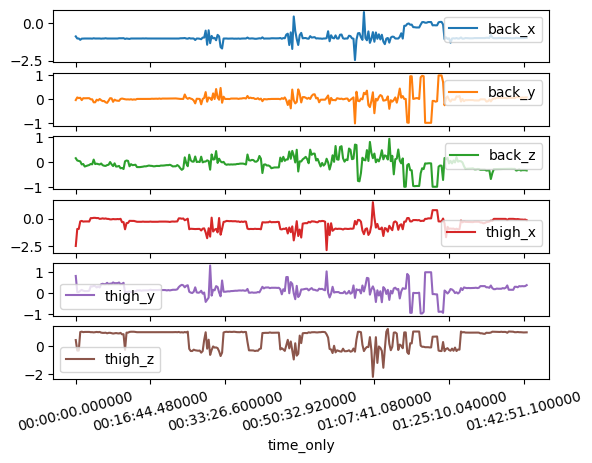

            count      mean       std       min       25%       50%       75%  \
back_x   337602.0 -0.913901  0.287959 -4.129828 -0.992962 -0.990806 -0.920490   
back_y   337602.0 -0.073271  0.214013 -2.815304 -0.117569 -0.071627 -0.031717   
back_z   337602.0 -0.085220  0.277762 -2.179715 -0.245805 -0.065296  0.086848   
thigh_x  337602.0 -0.643849  0.475392 -5.774578 -0.975718 -0.411472 -0.267174   
thigh_y  337602.0 -0.021425  0.280223 -4.697262 -0.096395 -0.035435  0.059988   
thigh_z  337602.0  0.384317  0.595033 -4.966474 -0.171640  0.450680  0.943788   

              max  
back_x   0.769492  
back_y   2.331906  
back_z   1.422140  
thigh_x  4.586190  
thigh_y  3.102282  
thigh_z  4.060093  


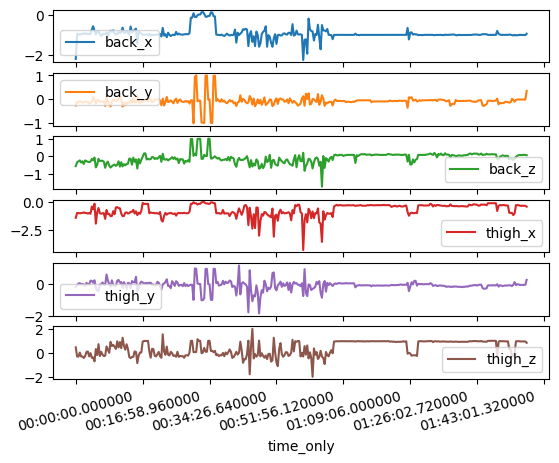

            count      mean       std       min       25%       50%       75%  \
back_x   137646.0 -0.822281  0.577614 -4.878906 -1.112061 -0.841309 -0.510498   
back_y   137646.0 -0.008072  0.269876 -3.596436 -0.109375 -0.007080  0.119385   
back_z   137646.0 -0.029522  0.502161 -4.907959 -0.268311 -0.124756  0.127441   
thigh_x  137646.0 -0.881266  0.890084 -8.000000 -1.225830 -0.893799 -0.203125   
thigh_y  137646.0 -0.013029  0.507002 -4.815430 -0.129395  0.038086  0.156250   
thigh_z  137646.0 -0.348715  0.673465 -5.713867 -1.028809 -0.225708  0.057129   

              max  
back_x   0.639893  
back_y   3.256592  
back_z   1.089844  
thigh_x  4.457520  
thigh_y  5.778076  
thigh_z  5.347900  


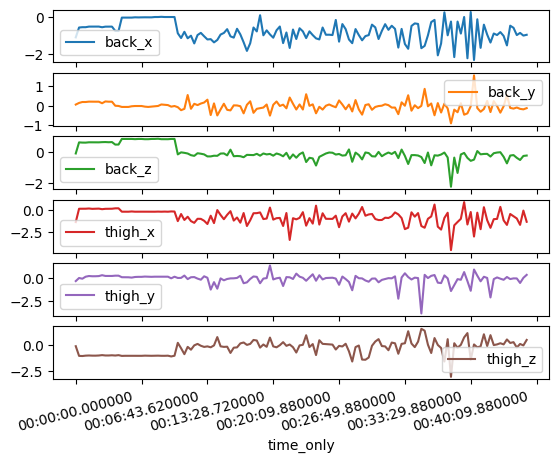

            count      mean       std       min       25%       50%       75%  \
back_x   170534.0 -0.764521  0.619950 -8.000000 -1.049072 -0.784668 -0.410217   
back_y   170534.0 -0.038477  0.308314 -4.307617 -0.153076  0.007080  0.076416   
back_z   170534.0 -0.164528  0.574561 -6.574463 -0.492920 -0.295898  0.359375   
thigh_x  170534.0 -0.811390  0.909850 -8.000000 -1.163330 -0.811035 -0.062500   
thigh_y  170534.0 -0.113349  0.498555 -7.061523 -0.492676 -0.046875  0.108154   
thigh_z  170534.0 -0.325172  0.752799 -7.987061 -0.953125 -0.187256  0.115723   

              max  
back_x   1.527344  
back_y   6.491943  
back_z   1.686279  
thigh_x  7.020508  
thigh_y  7.999756  
thigh_z  5.290283  


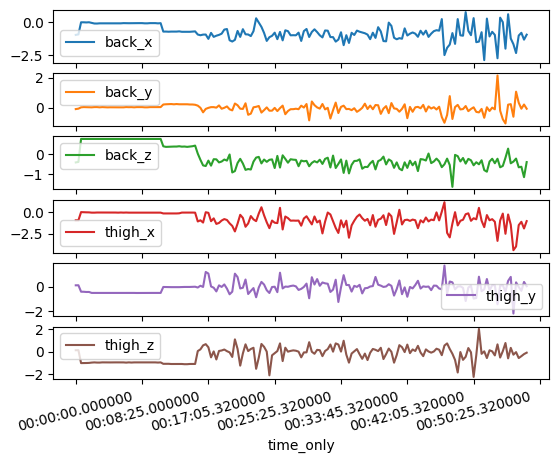

            count      mean       std       min       25%       50%       75%  \
back_x   231729.0 -0.867146  0.522148 -5.766602 -1.041992 -0.910645 -0.666992   
back_y   231729.0 -0.154921  0.205845 -3.100098 -0.249512 -0.154053 -0.020264   
back_z   231729.0 -0.203340  0.439667 -4.011719 -0.480713 -0.274902 -0.096924   
thigh_x  231729.0 -0.936320  0.737253 -8.000000 -1.208008 -0.976318 -0.415771   
thigh_y  231729.0 -0.098484  0.389615 -6.424316 -0.233887 -0.082764  0.062500   
thigh_z  231729.0 -0.291797  0.783600 -8.000000 -0.828125 -0.232666  0.131836   

              max  
back_x   1.187988  
back_y   2.296631  
back_z   2.609131  
thigh_x  7.999756  
thigh_y  7.948730  
thigh_z  7.999756  


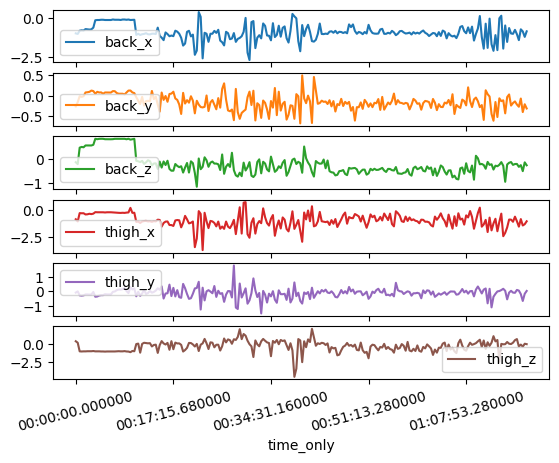

            count      mean       std       min       25%       50%       75%  \
back_x   195172.0 -0.895608  0.271232 -4.843994 -0.999023 -0.877441 -0.772217   
back_y   195172.0 -0.077164  0.129374 -2.614014 -0.140625 -0.070801 -0.003662   
back_z   195172.0 -0.576425  0.235219 -2.093994 -0.734375 -0.642822 -0.408203   
thigh_x  195172.0 -0.915848  0.505167 -7.471680 -1.199219 -0.954590 -0.599854   
thigh_y  195172.0 -0.190862  0.237449 -3.860352 -0.290283 -0.180908 -0.071533   
thigh_z  195172.0 -0.463827  0.557080 -5.408447 -0.848633 -0.506592 -0.067871   

              max  
back_x   0.592773  
back_y   1.268799  
back_z   0.468750  
thigh_x  2.482666  
thigh_y  5.165039  
thigh_z  3.554688  


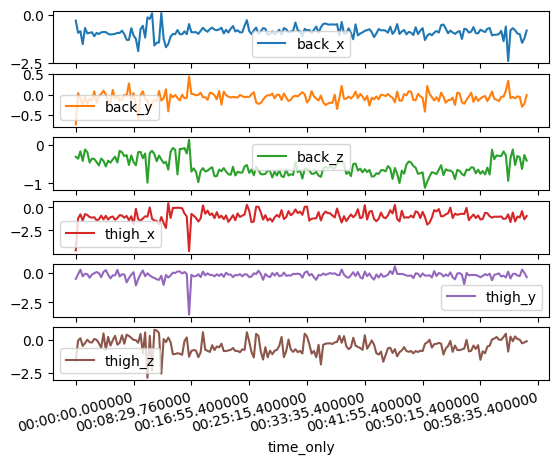

            count      mean       std       min       25%       50%       75%  \
back_x   158584.0 -0.882181  1.105910 -5.682617 -1.859863 -0.701416  0.062500   
back_y   158584.0 -0.077483  0.339537 -2.103271 -0.228760 -0.078613  0.087402   
back_z   158584.0 -0.148805  0.463853 -3.912842 -0.409180 -0.158203  0.100159   
thigh_x  158584.0 -1.107737  1.393962 -8.000000 -2.099365 -0.918213 -0.065186   
thigh_y  158584.0 -0.206297  0.858244 -6.801514 -0.730713 -0.131104  0.228760   
thigh_z  158584.0 -0.322133  1.393507 -8.000000 -1.062500 -0.458008  0.329163   

              max  
back_x   1.153809  
back_y   2.224365  
back_z   1.291748  
thigh_x  3.681641  
thigh_y  6.493896  
thigh_z  7.999756  


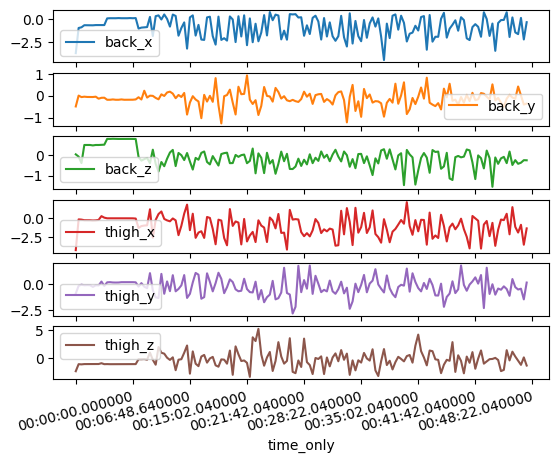

            count      mean       std       min       25%       50%       75%  \
back_x   165178.0 -1.012984  0.318585 -4.363037 -1.239014 -1.000854 -0.763184   
back_y   165178.0 -0.060648  0.181329 -2.300293 -0.149414 -0.036621  0.050049   
back_z   165178.0 -0.298160  0.260232 -3.231445 -0.398193 -0.250244 -0.172119   
thigh_x  165178.0 -1.046097  0.732322 -7.995361 -1.466309 -0.984375 -0.618896   
thigh_y  165178.0 -0.087043  0.626527 -4.999756 -0.252686 -0.062256  0.058594   
thigh_z  165178.0 -0.173465  0.726746 -5.487305 -0.570068 -0.107910  0.222412   

              max  
back_x   0.024902  
back_y   0.868652  
back_z   1.013672  
thigh_x  2.487061  
thigh_y  5.979248  
thigh_z  4.943115  


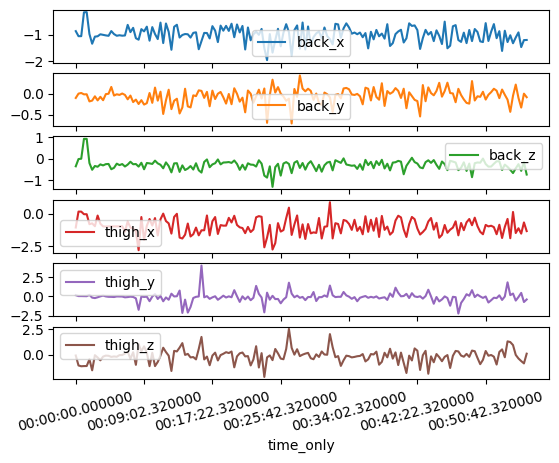

            count      mean       std       min       25%       50%       75%  \
back_x   178716.0 -0.930312  0.575831 -8.000000 -1.215332 -0.902344 -0.556885   
back_y   178716.0 -0.075362  0.221394 -3.179443 -0.179199 -0.086670  0.029053   
back_z   178716.0 -0.328587  0.368629 -6.107910 -0.505371 -0.277588 -0.196045   
thigh_x  178716.0 -1.042829  1.040983 -8.000000 -1.492676 -0.984375 -0.553711   
thigh_y  178716.0 -0.267606  0.835120 -7.997314 -0.486389 -0.212158 -0.000488   
thigh_z  178716.0 -0.100544  1.171253 -8.000000 -0.488037 -0.021973  0.441650   

              max  
back_x   1.355957  
back_y   2.913086  
back_z   2.575439  
thigh_x  7.190430  
thigh_y  5.909668  
thigh_z  6.816162  


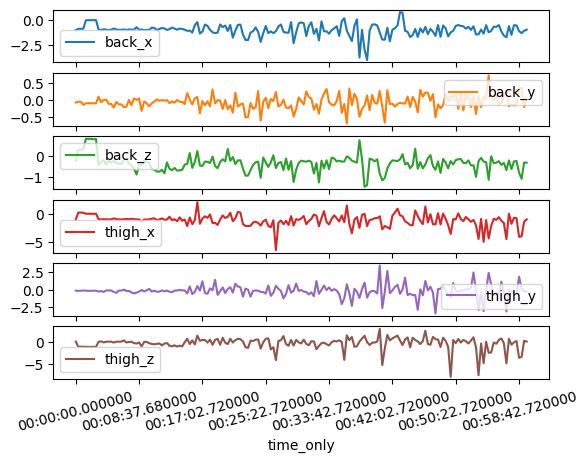

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define the directory containing the CSV files
directory = 'harth2'

# Get a list of all CSV files in the directory
csv_files = [file for file in os.listdir(directory) if file.endswith('.csv')]

# Iterate over each CSV file
for csv_file in csv_files:
    # Read the CSV file
    df = pd.read_csv(os.path.join(directory, csv_file))

    medians = df.drop(['label'], axis=1)
    print(medians.describe().transpose())

    
    df = df[0::1000]    
    # Now, you can plot the data as before
    plot_cols = ['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z']
    plot_features = df[plot_cols]
    
    # Assign the formatted timestamp as index
    plot_features.index = df['time_only']
    
    # Plot the data
    plot_features.plot(subplots=True)
    
    plt.xticks(rotation=15)  # Adjust the angle as needed
    plt.show()  # Show the plot for the current CSV file


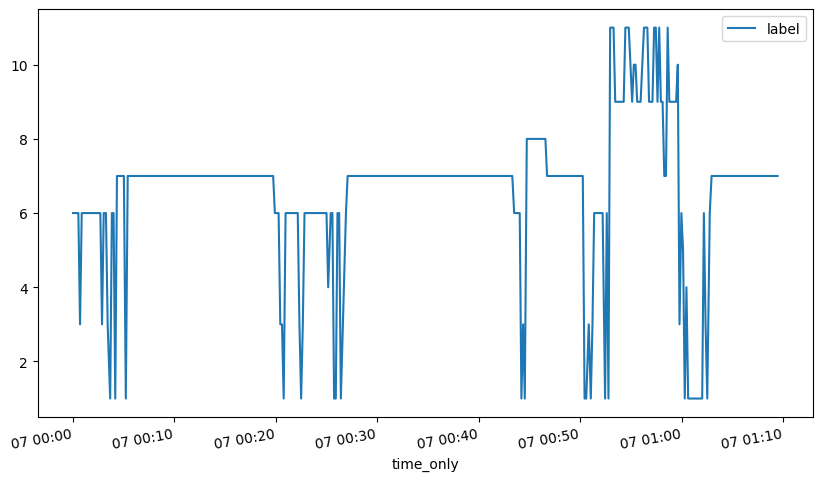

In [61]:
# Assuming 'timestamp' is the name of your timestamp column
#df['timestamp'] = pd.to_datetime(df['timestamp']) # Convert timestamp to datetime if it's not already
#df['timestamp'] = df['timestamp'].dt.strftime('%H:%M:%S') # Format timestamp column
# Define mapping
mapping = {1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 13: 9, 14: 10, 130: 11, 140: 12}
# Replace values
df['label'] = df['label'].replace(mapping)

# Now, you can plot the data as before
plot_cols = ['label']
plot_features = df[plot_cols]

# Assign the formatted timestamp as index
plot_features.index = df['time_only']

#plt.figure(figsize=(20, 15))  # Adjust the width and height as needed
df[plot_cols].plot(figsize=(10,6))

plt.xticks(rotation=10)  # Adjust the angle as needed

plt.show()

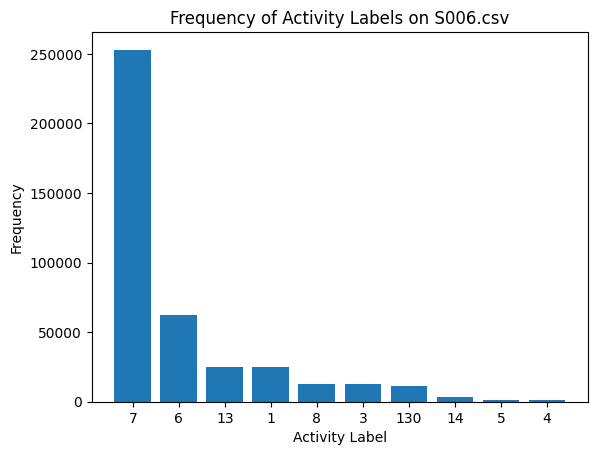

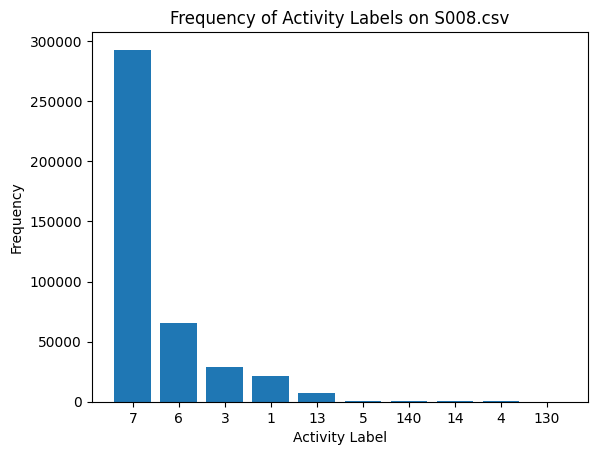

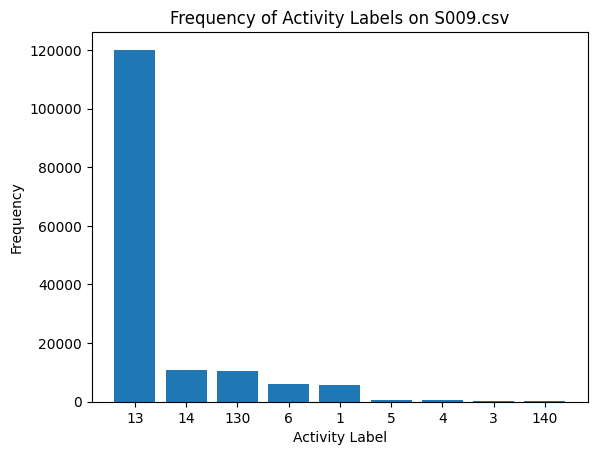

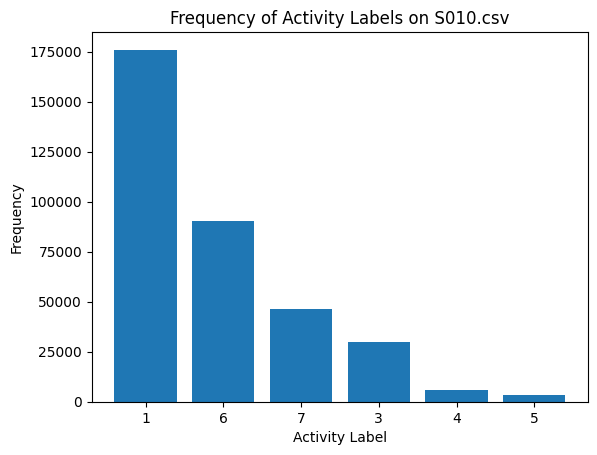

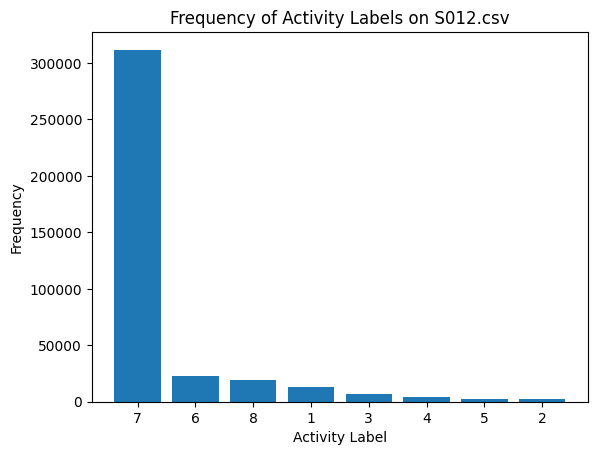

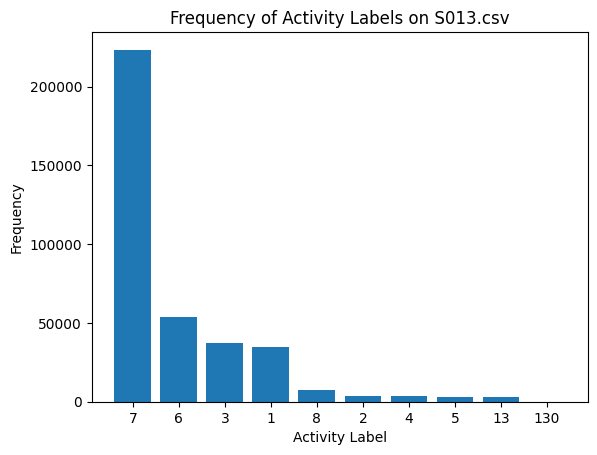

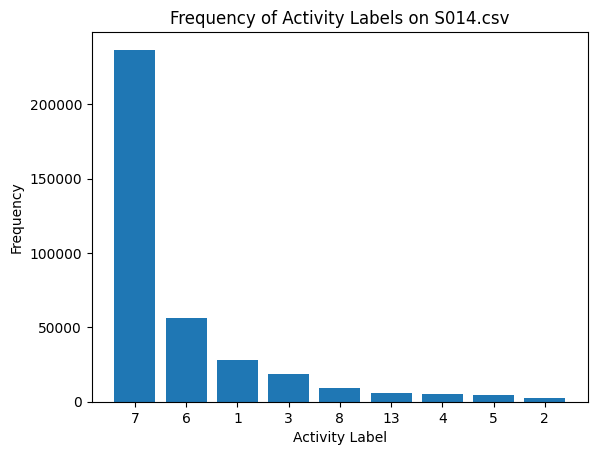

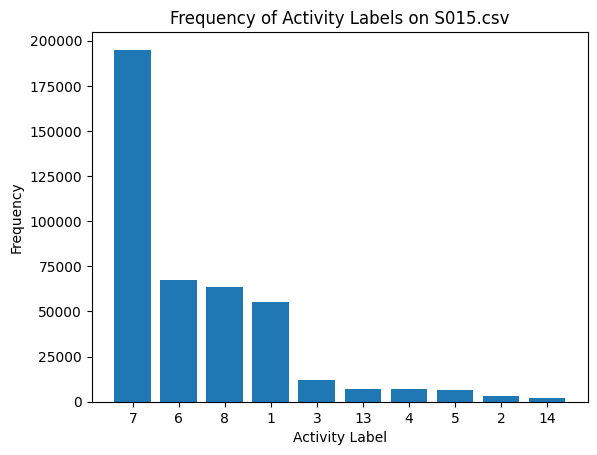

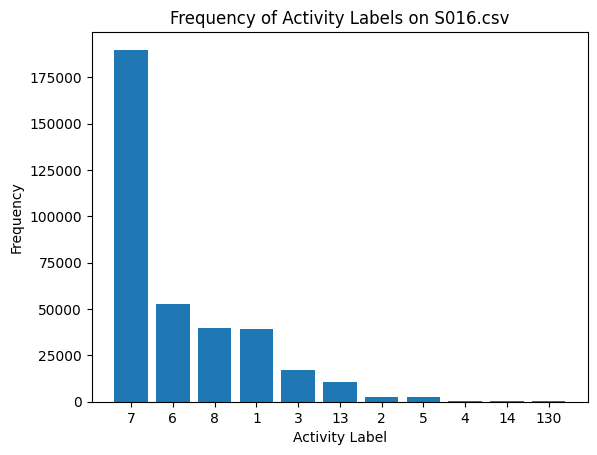

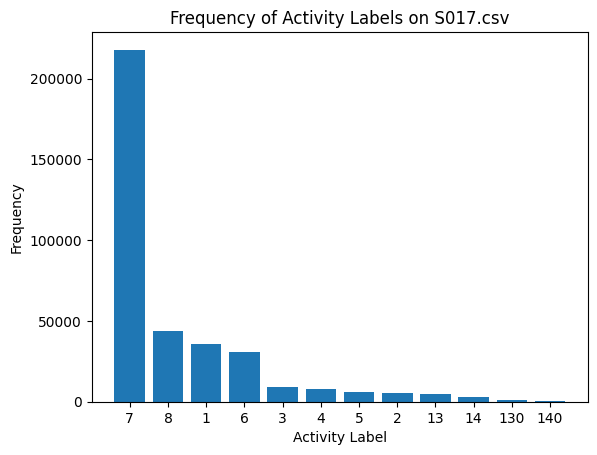

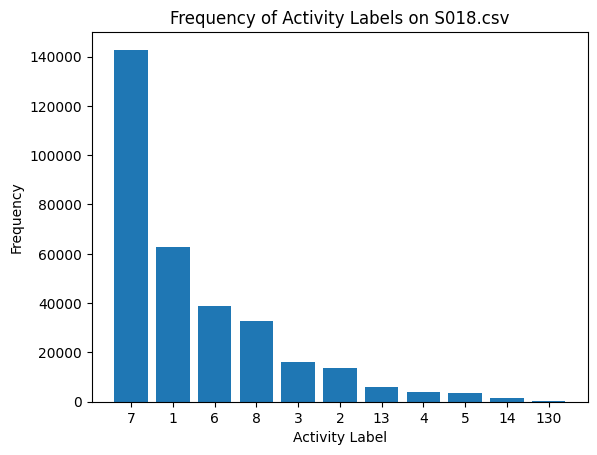

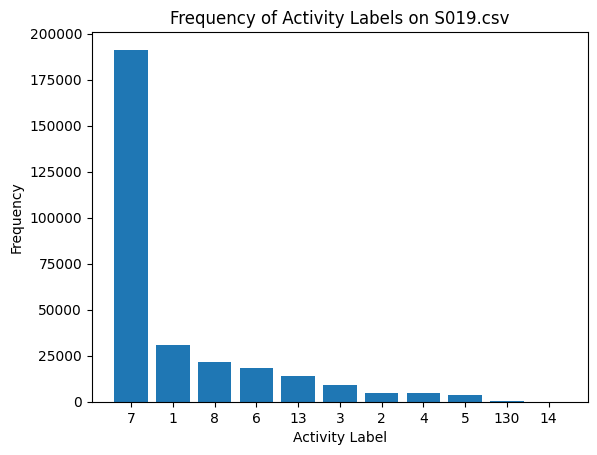

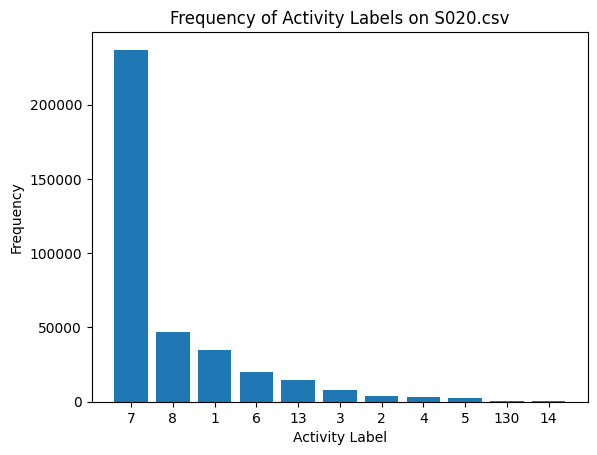

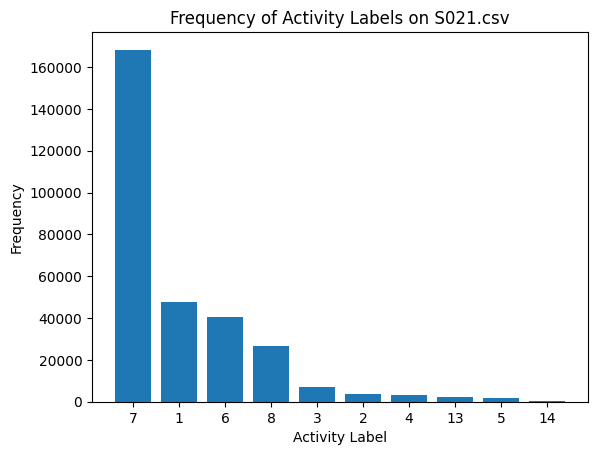

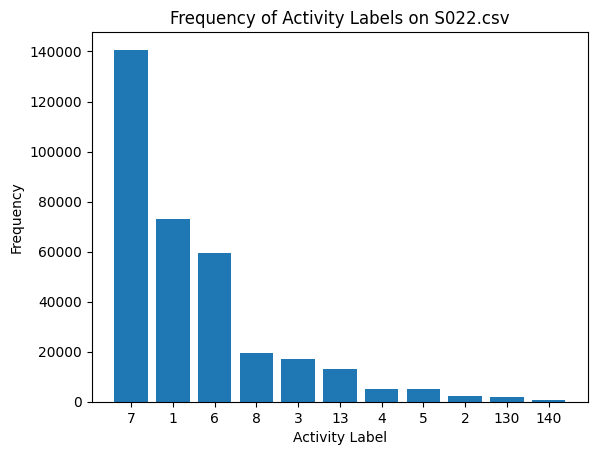

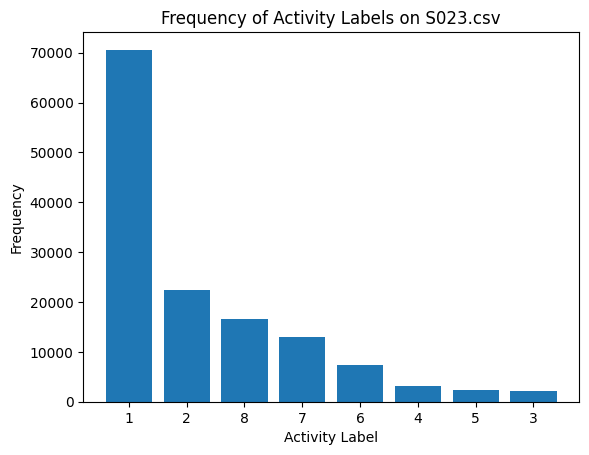

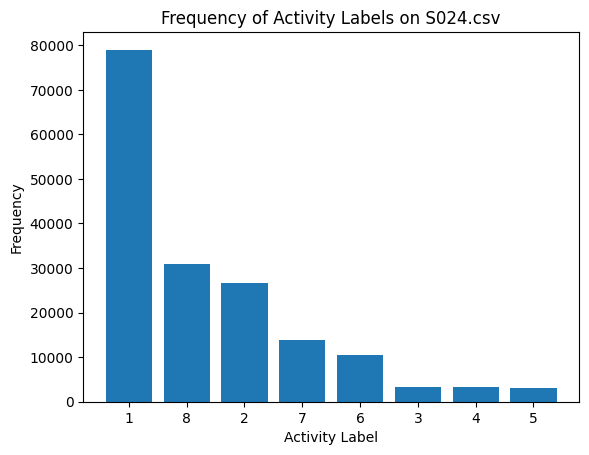

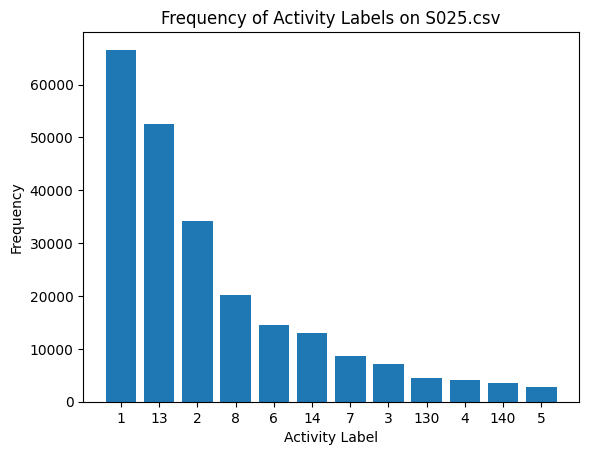

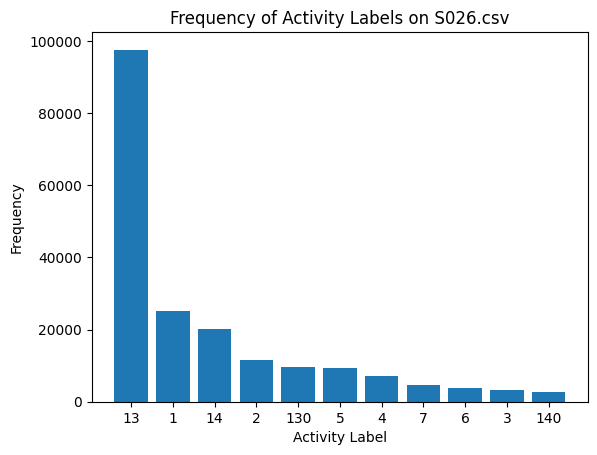

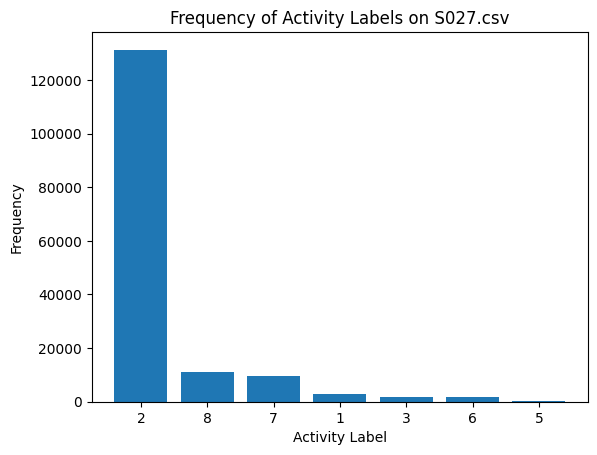

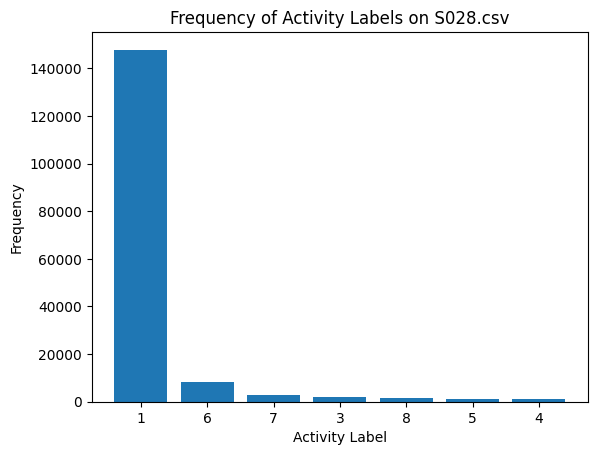

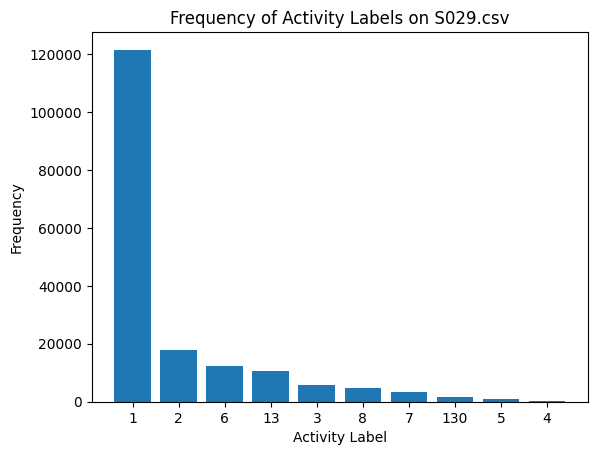

In [12]:
# Define the directory containing the CSV files
directory = 'harth2'

# Define the labels dictionary
labels = {1: "walking", 2: "running", 3: "shuffling", 4: "stairs (ascending)",
          5: "stairs (descending)", 6: "standing", 7: "sitting", 8: "lying",
          13: "cycling (sit)", 14: "cycling (stand)", 130: "cycling (sit, inactive)", 140: "cycling (stand, inactive)"}

# Get a list of all CSV files in the directory
csv_files = [file for file in os.listdir(directory) if file.endswith('.csv')]

# Iterate over each CSV file
for csv_file in csv_files:
    # Read the CSV file
    df = pd.read_csv(os.path.join(directory, csv_file))
    
    label_counts = df['label'].value_counts()
    plt.bar(range(len(label_counts)), label_counts.values)
    plt.xlabel('Activity Label')
    plt.ylabel('Frequency')
    plt.title('Frequency of Activity Labels on '+ str(csv_file))
    plt.xticks(range(len(label_counts)), label_counts.index)
    plt.show()

# Median 

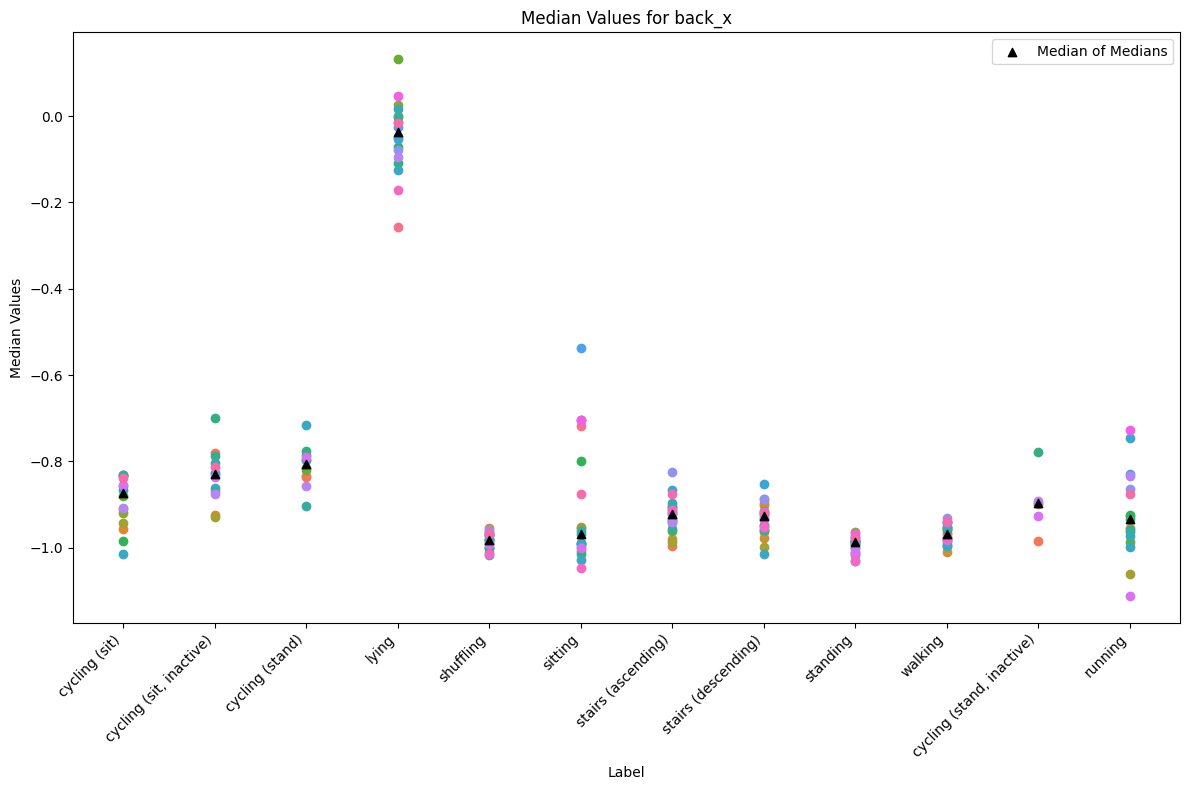

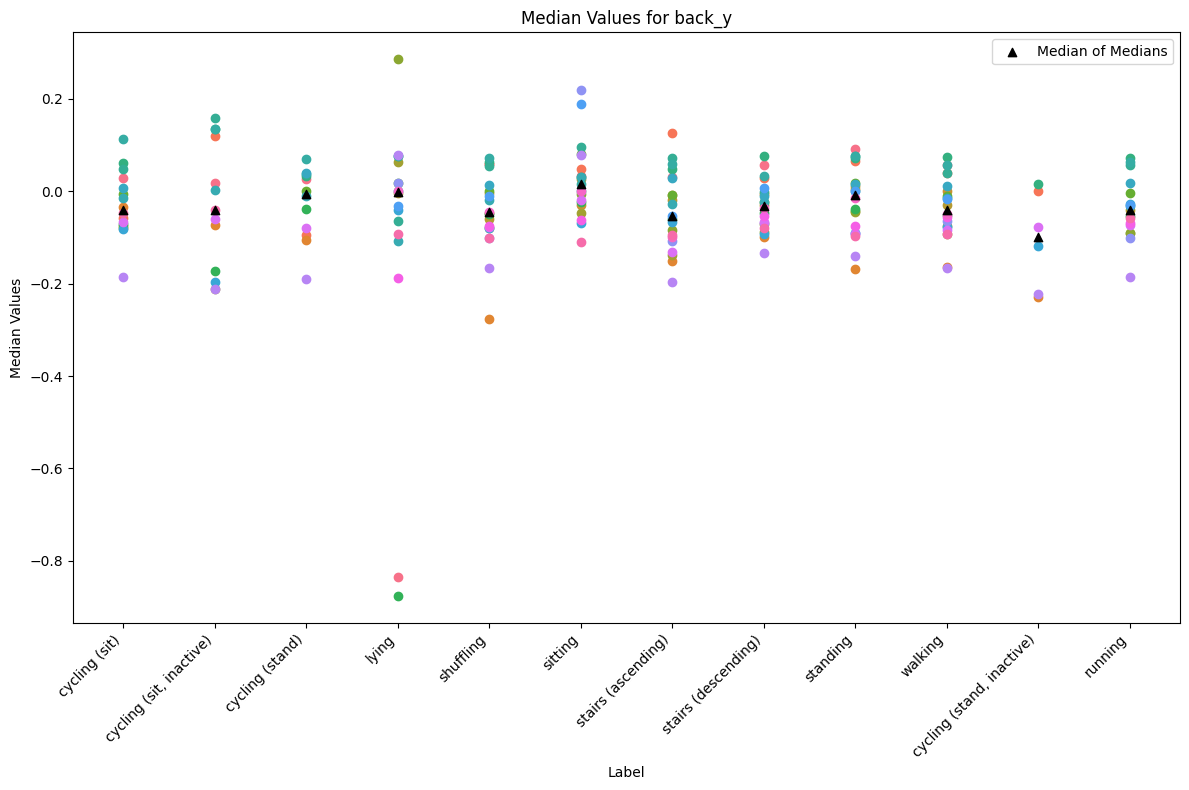

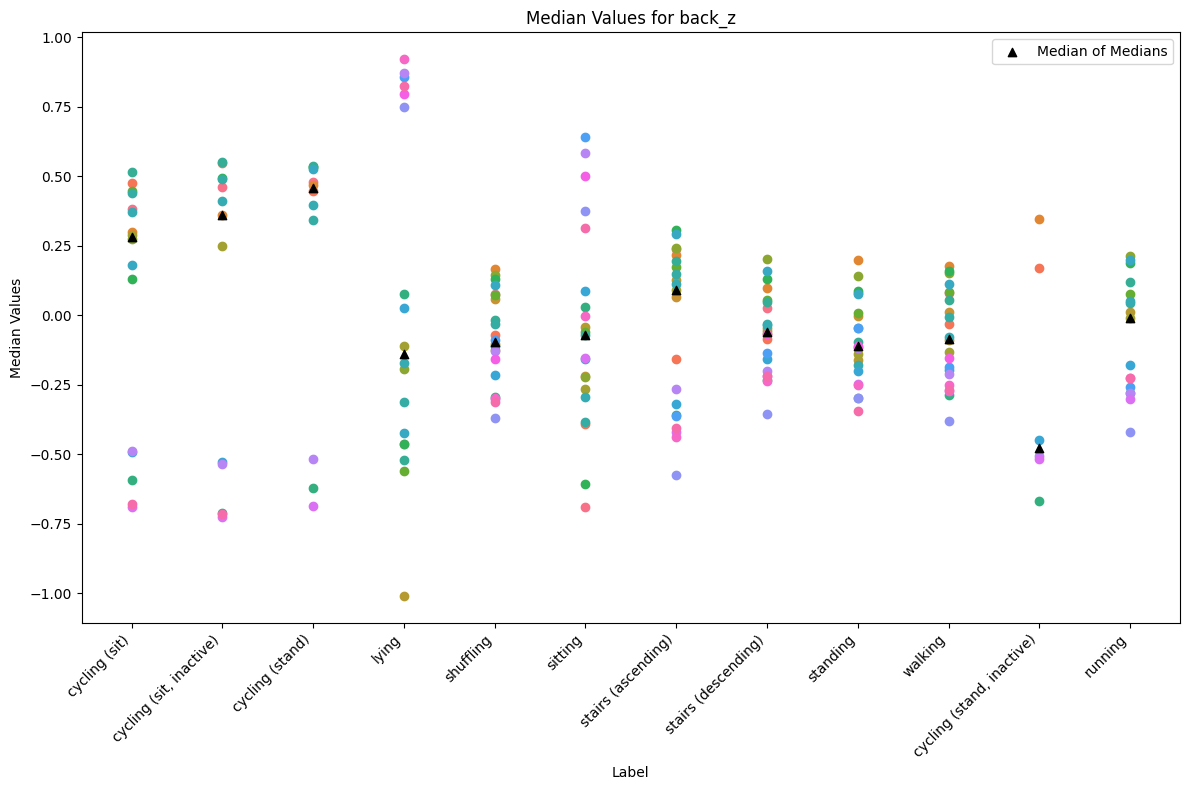

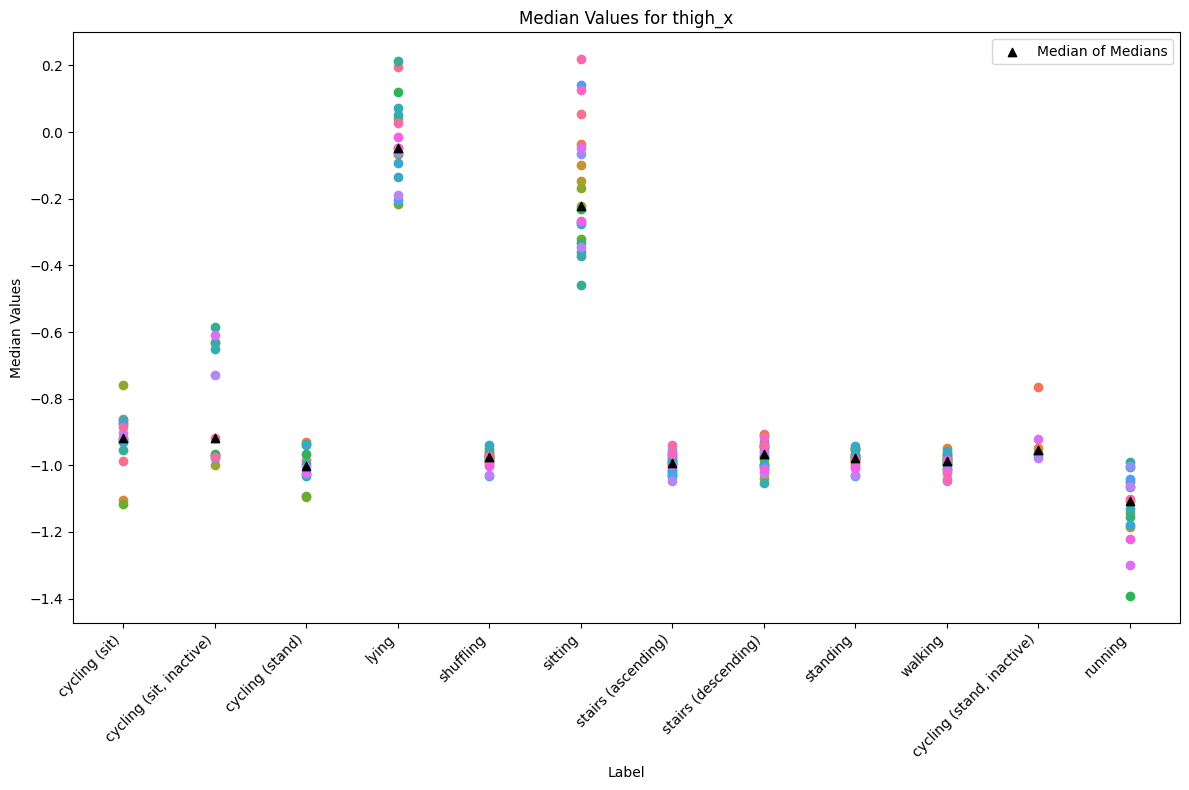

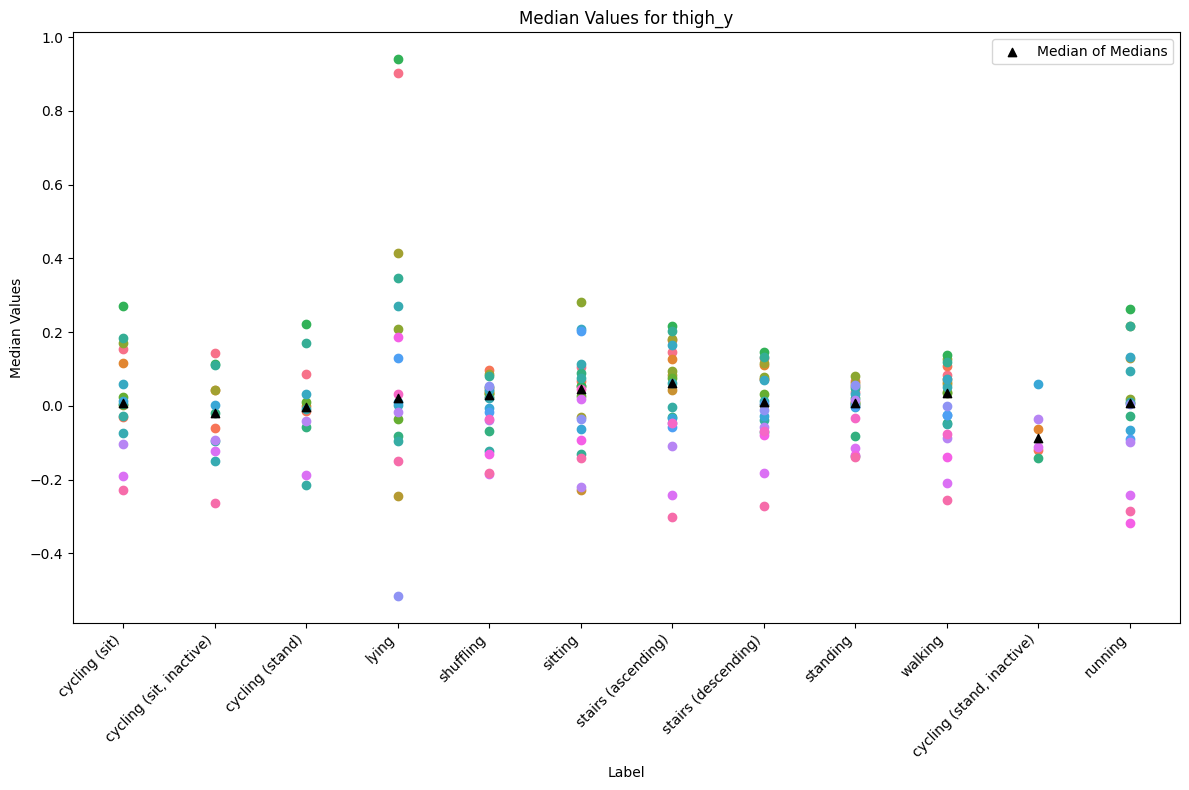

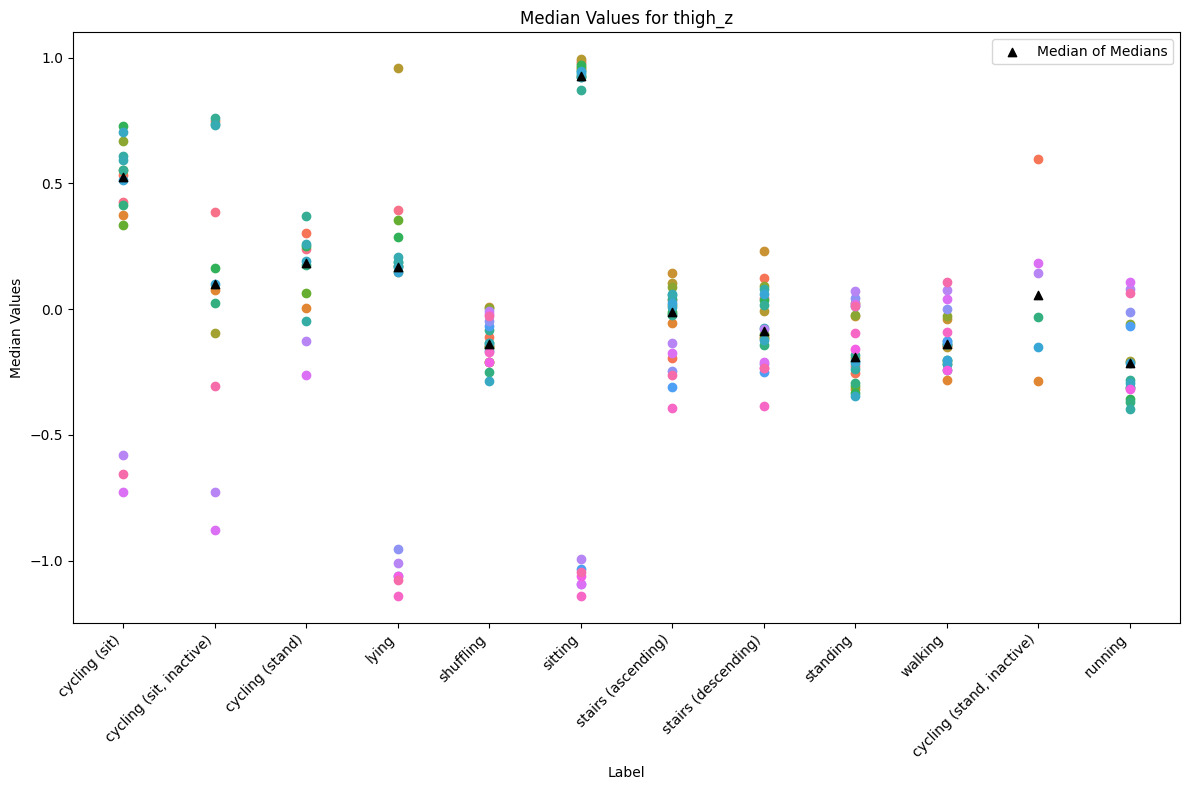

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import seaborn as sns  # Import seaborn for color palettes

# Get a list of all CSV files in a directory
csv_files = glob.glob('harth/*.csv')
# Define the labels dictionary
labels = {1: "walking", 2: "running", 3: "shuffling", 4: "stairs (ascending)",
          5: "stairs (descending)", 6: "standing", 7: "sitting", 8: "lying",
          13: "cycling (sit)", 14: "cycling (stand)", 130: "cycling (sit, inactive)", 140: "cycling (stand, inactive)"}
# Define a color palette with enough colors for the number of CSV files
colors = sns.color_palette('husl', len(csv_files))

# Iterate through each column
for column in ['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z']:
    plt.figure(figsize=(12, 8))

    # Define a list to store the medians grouped by label
    grouped_medians = {label: [] for label in labels.values()}

    # Iterate through each CSV file
    for idx, csv_file in enumerate(csv_files):
        # Read the CSV file
        df = pd.read_csv(csv_file)
        
        # Group the data by 'label' and calculate the median for the current column
        median_df = df.groupby('label')[column].median().reset_index()
        median_df['label'] = median_df['label'].map(labels)
        median_df = median_df.sort_values(by='label')  # Sorting by label
        
        # Append the median values to the list for each label
        for label, median in zip(median_df['label'], median_df[column]):
            grouped_medians[label].append(median)

        # Plot median values for the current column and CSV file
        plt.scatter(median_df['label'], median_df[column], color=colors[idx])

    # Calculate the median of medians for each label
    median_of_medians = {label: pd.Series(medians).median() for label, medians in grouped_medians.items()}

    # Plot the median of medians for each label
    plt.scatter(median_of_medians.keys(), median_of_medians.values(), marker='^', color='black', label='Median of Medians')

    # Add title, labels, and legend
    plt.title(f"Median Values for {column}")
    plt.xlabel('Label')
    plt.ylabel('Median Values')
    plt.xticks(rotation=45, ha='right')
    plt.legend()

    plt.tight_layout()
    plt.show()